<a href="https://colab.research.google.com/github/pramodcgupta/Machine-Learning-Predictions/blob/master/Decision_Tree_Classifier_on_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Created on Sun Sep  1 00:12:41 2019
Program: Decision Tree Classifier
Author: Pramodkumar Gupta
"""

# Import all libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Disable all warning to display
warnings.filterwarnings("ignore")

# Read data into pandas dataframe

df=pd.read_csv('Social_Network_Ads.csv')

In [0]:
# Slice the data in indepedent and depedent variables
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [0]:
# Divide data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [0]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [0]:
# Model Building for Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

In [6]:
# Evaluation of Model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

# Print all Matrix
print('Confusion Matrix: ',cm)
print('')
print('Accuracy (%): ', acc)
print('')
print("Classification Report: ")
print(report)

Confusion Matrix:  [[62  6]
 [ 4 28]]

Accuracy (%):  0.9

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


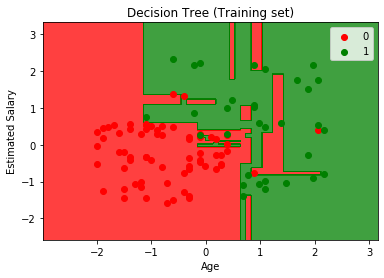

In [7]:
# Visualize the test data 
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()